In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

L'analyse qui va suivre est faite dans le cadre d'une étude de marché pour La Poule Qui Chante, une entreprise française agroalimentaire ayant pour objectif d'exporter ses poulets à l'international. Notre objectif ici va être de récupérer des données sur les pays pour en comprendre les comportements de consommation, et ainsi identifier les pays les plus intéressants pour y vendre.

## Import des données et nettoyage

On commence tout d'abord par récupérer les données de la FAO concernant le sujet (les indicateurs de la FAO portent sur la viande de volaille, ce qui inclut plusieurs autres espèces que le poulet, mais on suppose ici que ce dernier constitue la grande majorité de la production).

In [58]:
donnees_fao = pd.read_csv("donnees_fao.csv",index_col=2)

In [59]:
annee=2020

In [60]:
donnees_fao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33071 entries, 4 to 716
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       33071 non-null  object 
 1   Domain            33071 non-null  object 
 2   Area              33071 non-null  object 
 3   Element Code      33071 non-null  int64  
 4   Element           33071 non-null  object 
 5   Item Code (CPC)   33071 non-null  object 
 6   Item              33071 non-null  object 
 7   Year Code         33071 non-null  int64  
 8   Year              33071 non-null  int64  
 9   Unit              33071 non-null  object 
 10  Value             33071 non-null  float64
 11  Flag              33071 non-null  object 
 12  Flag Description  33071 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 3.5+ MB


In [61]:
donnees_fao.nunique()

Domain Code             1
Domain                  1
Area                  186
Element Code           20
Element                20
Item Code (CPC)         2
Item                    2
Year Code              11
Year                   11
Unit                    7
Value               12336
Flag                    3
Flag Description        3
dtype: int64

In [62]:
donnees_fao.drop(columns=['Domain','Domain Code','Element Code','Item Code (CPC)','Year Code','Flag','Flag Description'],inplace=True)
donnees_fao

,Area,Element,Item,Year,Unit,Value
Area Code (M49),,,,,,
4,Afghanistan,Total Population - Both sexes,Population,2010,1000 No,29186.00
4,Afghanistan,Total Population - Both sexes,Population,2011,1000 No,30117.00
4,Afghanistan,Total Population - Both sexes,Population,2012,1000 No,31161.00
4,Afghanistan,Total Population - Both sexes,Population,2013,1000 No,32270.00
4,Afghanistan,Total Population - Both sexes,Population,2014,1000 No,33371.00
...,...,...,...,...,...,...
716,Zimbabwe,Fat supply quantity (g),Poultry Meat,2016,g,5767.33
716,Zimbabwe,Fat supply quantity (g),Poultry Meat,2017,g,5788.78
716,Zimbabwe,Fat supply quantity (g),Poultry Meat,2018,g,5090.83


In [63]:
donnees_fao_2020 = donnees_fao.loc[donnees_fao["Year"] == annee]
donnees_fao_2020

,Area,Element,Item,Year,Unit,Value
Area Code (M49),,,,,,
4,Afghanistan,Total Population - Both sexes,Population,2020,1000 No,38928.35
4,Afghanistan,Domestic supply quantity,Population,2020,1000 t,0.00
4,Afghanistan,Production,Poultry Meat,2020,1000 t,28.00
4,Afghanistan,Import Quantity,Poultry Meat,2020,1000 t,36.00
4,Afghanistan,Stock Variation,Poultry Meat,2020,1000 t,-2.00
...,...,...,...,...,...,...
716,Zimbabwe,Food supply (kcal),Poultry Meat,2020,million Kcal,83875.63
716,Zimbabwe,Protein supply quantity (g/capita/day),Poultry Meat,2020,g/pc/d,1.56
716,Zimbabwe,Protein supply quantity (g),Poultry Meat,2020,g,8449.97


In [64]:
donnees_fao_2020 = donnees_fao_2020.pivot_table(index=["Area","Year"],values="Value",columns=['Element','Item','Unit'])
donnees_fao_2020

Element                                 Domestic supply quantity               \
Item                                                  Population Poultry Meat   
Unit                                                      1000 t       1000 t   
Area                               Year                                         
Afghanistan                        2020                      0.0         67.0   
Albania                            2020                      0.0         40.0   
Algeria                            2020                      0.0        280.0   
Angola                             2020                      0.0        276.0   
Antigua and Barbuda                2020                      0.0          6.0   
...                                                          ...          ...   
Venezuela (Bolivarian Republic of) 2020                      0.0        458.0   
Viet Nam                           2020                      0.0       1539.0   
Yemen                              2020                      0.0        335.0   
Zambia                             2020                      0.0         49.0   
Zimbabwe                           2020                      0.0         69.0   

Element                                 Export Quantity  \
Item                                       Poultry Meat   
Unit                                             1000 t   
Area                               Year                   
Afghanistan                        2020             0.0   
Albania                            2020             NaN   
Algeria                            2020             1.0   
Angola                             2020             NaN   
Antigua and Barbuda                2020             0.0   
...                                                 ...   
Venezuela (Bolivarian Republic of) 2020             NaN   
Viet Nam                           2020            17.0   
Yemen                              2020             NaN   
Zambia                             2020             9.0   
Zimbabwe                           2020             NaN   

Element                                 Fat supply quantity (g)  \
Item                                               Poultry Meat   
Unit                                                          g   
Area                               Year                           
Afghanistan                        2020                 5297.89   
Albania                            2020                 5612.19   
Algeria                            2020                24130.89   
Angola                             2020                21237.57   
Antigua and Barbuda                2020                  710.70   
...                                                         ...   
Venezuela (Bolivarian Republic of) 2020                36630.75   
Viet Nam                           2020               154071.16   
Yemen                              2020                26455.12   
Zambia                             2020                 3740.08   
Zimbabwe                           2020                 5296.72   

Element                                 Fat supply quantity (g/capita/day)  \
Item                                                          Poultry Meat   
Unit                                                                g/pc/d   
Area                               Year                                      
Afghanistan                        2020                               0.37   
Albania                            2020                               5.34   
Algeria                            2020                               1.51   
Angola                             2020                               1.77   
Antigua and Barbuda                2020                              19.88   
...                                                                    ...   
Venezuela (Bolivarian Republic of) 2020                               3.53   
Viet Nam                          

Une fois notre jeu de données adapté à notre problématique, on décide de construire un nouveau tableau à partir de ces données afin d'obtenir plusieurs indicateurs issu d'opérations sur les colonnes, puis on effectue ensuite un nettoyage pour isoler d'éventuelles données manquantes.

In [65]:
donnees_fao_2020.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 186 entries, ('Afghanistan', 2020) to ('Zimbabwe', 2020)
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   (Domestic supply quantity, Population, 1000 t)                  186 non-null    float64
 1   (Domestic supply quantity, Poultry Meat, 1000 t)                186 non-null    float64
 2   (Export Quantity, Poultry Meat, 1000 t)                         135 non-null    float64
 3   (Fat supply quantity (g), Poultry Meat, g)                      186 non-null    float64
 4   (Fat supply quantity (g/capita/day), Poultry Meat, g/pc/d)      186 non-null    float64
 5   (Food, Poultry Meat, 1000 t)                                    186 non-null    float64
 6   (Food supply (kcal), Poultry Meat, million Kcal)                186 non-null    float64
 7   (Food supply (kcal

In [66]:
tableau_donnees = pd.DataFrame()
tableau_donnees['Nombre habitants'] = donnees_fao_2020["Total Population - Both sexes"] * 1000
tableau_donnees['Production'] = donnees_fao_2020["Production"]
tableau_donnees['Importations'] = donnees_fao_2020["Import Quantity"]
tableau_donnees['Exportations'] = donnees_fao_2020["Export Quantity"]
tableau_donnees['Variation de stock'] = donnees_fao_2020["Stock Variation"]
tableau_donnees['Disponibilité alimentaire (million Kcal)'] = donnees_fao_2020["Food supply (kcal)"]
tableau_donnees['Disponibilité alimentaire (Kcal/personne/jour)'] = donnees_fao_2020["Food supply (kcal/capita/day)"]
tableau_donnees['Disponibilité alimentaire en quantité (kg/personne/an)'] = donnees_fao_2020["Food supply quantity (kg/capita/yr)"]
tableau_donnees['Disponibilité de matière grasse en quantité (g/personne/jour)'] = donnees_fao_2020["Fat supply quantity (g/capita/day)"]
tableau_donnees['Disponibilité de protéines en quantité (g/personne/jour)'] = donnees_fao_2020["Protein supply quantity (g/capita/day)"]
tableau_donnees = tableau_donnees.fillna(0)
tableau_donnees

,,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Area,Year,,,,,,,,,,
Afghanistan,2020,38928350.0,28.0,36.0,0.0,-2.0,85013.52,5.98,1.71,0.37,0.61
Albania,2020,2877800.0,14.0,26.0,0.0,0.0,74856.75,71.27,13.94,5.34,5.41
Algeria,2020,43851040.0,284.0,0.0,1.0,3.0,352767.29,22.04,6.38,1.51,1.96
Angola,2020,32866270.0,52.0,224.0,0.0,0.0,338127.40,28.19,8.41,1.77,2.86
Antigua and Barbuda,2020,97930.0,0.0,6.0,0.0,0.0,9465.98,264.83,61.76,19.88,20.31
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2020,28435940.0,457.0,1.0,0.0,0.0,585708.95,56.43,16.11,3.53,5.74
Viet Nam,2020,97338580.0,1319.0,236.0,17.0,0.0,2170337.08,61.09,15.81,4.34,5.14
Yemen,2020,29825960.0,195.0,140.0,0.0,0.0,425220.79,39.06,11.22,2.43,4.00


In [67]:
tableau_donnees['Disponibilité intérieure (milliers de tonnes)'] = tableau_donnees['Production'] + tableau_donnees['Importations'] - tableau_donnees['Exportations'] + tableau_donnees['Variation de stock']
tableau_donnees['Disponibilité en matière grasse (milliers de tonnes)'] = (tableau_donnees['Disponibilité de matière grasse en quantité (g/personne/jour)'] * tableau_donnees['Nombre habitants'] * 365) / 1000000
tableau_donnees

,,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes)
Area,Year,,,,,,,,,,,,
Afghanistan,2020,38928350.0,28.0,36.0,0.0,-2.0,85013.52,5.98,1.71,0.37,0.61,62.0,5257.273667
Albania,2020,2877800.0,14.0,26.0,0.0,0.0,74856.75,71.27,13.94,5.34,5.41,40.0,5609.119980
Algeria,2020,43851040.0,284.0,0.0,1.0,3.0,352767.29,22.04,6.38,1.51,1.96,286.0,24168.500696
Angola,2020,32866270.0,52.0,224.0,0.0,0.0,338127.40,28.19,8.41,1.77,2.86,276.0,21233.253733
Antigua and Barbuda,2020,97930.0,0.0,6.0,0.0,0.0,9465.98,264.83,61.76,19.88,20.31,6.0,710.599666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2020,28435940.0,457.0,1.0,0.0,0.0,585708.95,56.43,16.11,3.53,5.74,458.0,36638.286893
Viet Nam,2020,97338580.0,1319.0,236.0,17.0,0.0,2170337.08,61.09,15.81,4.34,5.14,1538.0,154194.044578
Yemen,2020,29825960.0,195.0,140.0,0.0,0.0,425220.79,39.06,11.22,2.43,4.00,335.0,26454.135222


In [68]:
tableau_donnees.describe()

,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes)
count,1.860000e+02,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02
mean,4.957317e+07,837.155914,99.946237,99.817204,23.387097,1.184099e+06,81.161505,22.092204,5.320215,7.772473,860.672043,8.353270e+04
std,1.836376e+08,3026.905813,259.332110,444.622705,122.301535,4.587175e+06,64.584020,17.046070,4.454388,5.980281,3010.178446,3.468834e+05
min,1.082000e+04,0.000000,0.000000,0.000000,-43.000000,6.875000e+02,1.630000,0.480000,0.100000,0.160000,1.000000,4.292889e+01
25%,2.447730e+06,10.000000,3.000000,0.000000,0.000000,4.178706e+04,24.582500,6.725000,1.515000,2.397500,39.000000,2.681254e+03
50%,9.775375e+06,70.000000,19.000000,0.000000,0.000000,1.350146e+05,68.745000,19.510000,4.225000,6.960000,109.500000,8.362623e+03
75%,3.120982e+07,328.000000,84.000000,12.750000,3.750000,4.376801e+05,116.112500,32.812500,7.607500,11.567500,391.250000,3.059548e+04
max,1.471287e+09,23150.000000,2391.000000,4047.000000,1113.000000,3.882883e+07,264.830000,74.650000,19.880000,28.380000,24944.000000,3.018051e+06


In [69]:
tableau_donnees = tableau_donnees.replace([np.inf, -np.inf], np.nan).dropna()
tableau_donnees

,,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes)
Area,Year,,,,,,,,,,,,
Afghanistan,2020,38928350.0,28.0,36.0,0.0,-2.0,85013.52,5.98,1.71,0.37,0.61,62.0,5257.273667
Albania,2020,2877800.0,14.0,26.0,0.0,0.0,74856.75,71.27,13.94,5.34,5.41,40.0,5609.119980
Algeria,2020,43851040.0,284.0,0.0,1.0,3.0,352767.29,22.04,6.38,1.51,1.96,286.0,24168.500696
Angola,2020,32866270.0,52.0,224.0,0.0,0.0,338127.40,28.19,8.41,1.77,2.86,276.0,21233.253733
Antigua and Barbuda,2020,97930.0,0.0,6.0,0.0,0.0,9465.98,264.83,61.76,19.88,20.31,6.0,710.599666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2020,28435940.0,457.0,1.0,0.0,0.0,585708.95,56.43,16.11,3.53,5.74,458.0,36638.286893
Viet Nam,2020,97338580.0,1319.0,236.0,17.0,0.0,2170337.08,61.09,15.81,4.34,5.14,1538.0,154194.044578
Yemen,2020,29825960.0,195.0,140.0,0.0,0.0,425220.79,39.06,11.22,2.43,4.00,335.0,26454.135222


In [70]:
tableau_donnees.describe()

,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes)
count,1.860000e+02,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02
mean,4.957317e+07,837.155914,99.946237,99.817204,23.387097,1.184099e+06,81.161505,22.092204,5.320215,7.772473,860.672043,8.353270e+04
std,1.836376e+08,3026.905813,259.332110,444.622705,122.301535,4.587175e+06,64.584020,17.046070,4.454388,5.980281,3010.178446,3.468834e+05
min,1.082000e+04,0.000000,0.000000,0.000000,-43.000000,6.875000e+02,1.630000,0.480000,0.100000,0.160000,1.000000,4.292889e+01
25%,2.447730e+06,10.000000,3.000000,0.000000,0.000000,4.178706e+04,24.582500,6.725000,1.515000,2.397500,39.000000,2.681254e+03
50%,9.775375e+06,70.000000,19.000000,0.000000,0.000000,1.350146e+05,68.745000,19.510000,4.225000,6.960000,109.500000,8.362623e+03
75%,3.120982e+07,328.000000,84.000000,12.750000,3.750000,4.376801e+05,116.112500,32.812500,7.607500,11.567500,391.250000,3.059548e+04
max,1.471287e+09,23150.000000,2391.000000,4047.000000,1113.000000,3.882883e+07,264.830000,74.650000,19.880000,28.380000,24944.000000,3.018051e+06


Maintenant que nous avons un jeu de données concernant la production de poulet à travers le monde, on va affiner notre analyse en y ajoutant des données économiques, en l'occurrence celles concernant le PIB récoltées par la Banque Mondiale.

In [71]:
donnees_pib = pd.read_csv("donnees_pib.csv")
donnees_pib

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,...,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.074393e+09,6.295845e+09,6.682674e+09,7.180769e+09,7.878763e+09,7.899741e+09,7.717143e+09,9.412034e+09,9.429156e+09,NaN
262,Yemen,YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041589e+11,3.885312e+11,3.376196e+11,4.190156e+11,4.058697e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.811064e+10,2.214765e+10,2.978445e+10,NaN


In [72]:
donnees_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            132 non-null    float64
 5   1961            134 non-null    float64
 6   1962            136 non-null    float64
 7   1963            136 non-null    float64
 8   1964            136 non-null    float64
 9   1965            147 non-null    float64
 10  1966            150 non-null    float64
 11  1967            153 non-null    float64
 12  1968            158 non-null    float64
 13  1969            158 non-null    float64
 14  1970            167 non-null    float64
 15  1971            170 non-null    float64
 16  1972            170 non-null    float64
 17  1973            170 non-null    flo

In [73]:
donnees_pib_2020 = pd.DataFrame()

In [74]:
donnees_pib_2020["Area"] = donnees_pib["Country Name"]
donnees_pib_2020["Country Code"] = donnees_pib["Country Code"]
donnees_pib_2020["PIB 2020"] = donnees_pib["2020"]
donnees_pib_2020

,Area,Country Code,PIB 2020
0,Aruba,ABW,2.610039e+09
1,Africa Eastern and Southern,AFE,9.275933e+11
2,Afghanistan,AFG,2.014345e+10
3,Africa Western and Central,AFW,7.864600e+11
4,Angola,AGO,5.024137e+10
...,...,...,...
261,Kosovo,XKX,7.717143e+09
262,Yemen,YEM,NaN
263,South Africa,ZAF,3.376196e+11
264,Zambia,ZMB,1.811064e+10


Une fois les données formatées et adaptées à notre problématique, on fusionne les deux tableaux pour obtenir notre jeu de données final. Une analyse nous montre au passage que pour l'année 2020, la Banque Mondiale n'avait pas pu récolter les données de certains pays, ce qui sera à prendre en compte pour la suite de l'analyse.

In [75]:
tableau_donnees_2020 = pd.merge(tableau_donnees,donnees_pib_2020,on="Area",how="left",indicator=True)
tableau_donnees_2020

,Area,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes),Country Code,PIB 2020,_merge
0,Afghanistan,38928350.0,28.0,36.0,0.0,-2.0,85013.52,5.98,1.71,0.37,0.61,62.0,5257.273667,AFG,2.014345e+10,both
1,Albania,2877800.0,14.0,26.0,0.0,0.0,74856.75,71.27,13.94,5.34,5.41,40.0,5609.119980,ALB,1.516273e+10,both
2,Algeria,43851040.0,284.0,0.0,1.0,3.0,352767.29,22.04,6.38,1.51,1.96,286.0,24168.500696,DZA,1.457437e+11,both
3,Angola,32866270.0,52.0,224.0,0.0,0.0,338127.40,28.19,8.41,1.77,2.86,276.0,21233.253733,AGO,5.024137e+10,both
4,Antigua and Barbuda,97930.0,0.0,6.0,0.0,0.0,9465.98,264.83,61.76,19.88,20.31,6.0,710.599666,ATG,1.416348e+09,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela (Bolivarian Republic of),28435940.0,457.0,1.0,0.0,0.0,585708.95,56.43,16.11,3.53,5.74,458.0,36638.286893,NaN,NaN,left_only
182,Viet Nam,97338580.0,1319.0,236.0,17.0,0.0,2170337.08,61.09,15.81,4.34,5.14,1538.0,154194.044578,VNM,3.466158e+11,both
183,Yemen,29825960.0,195.0,140.0,0.0,0.0,425220.79,39.06,11.22,2.43,4.00,335.0,26454.135222,YEM,NaN,both
184,Zambia,18383960.0,52.0,21.0,9.0,15.0,59260.06,8.83,2.64,0.56,0.89,79.0,3757.681424,ZMB,1.811064e+10,both


In [76]:
pays_sans_donnees_pib = tableau_donnees_2020.loc[tableau_donnees_2020["_merge"] == "left_only"]
pays_sans_donnees_pib

,Area,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes),Country Code,PIB 2020,_merge
36,"China, Taiwan Province of",2.381678e+07,758.0,255.0,4.0,17.0,1353275.55,155.67,41.64,10.67,13.91,1026.0,9.275564e+04,NaN,NaN,left_only
37,"China, mainland",1.439324e+09,21278.0,1554.0,525.0,1076.0,36866267.43,70.17,14.98,5.49,4.82,23383.0,2.884189e+06,NaN,NaN,left_only
110,Micronesia (Federated States of),1.150200e+05,0.0,4.0,0.0,0.0,5370.93,127.93,38.15,7.91,13.24,4.0,3.320800e+02,NaN,NaN,left_only
142,Saint Kitts and Nevis,5.320000e+04,0.0,4.0,0.0,0.0,3180.32,163.79,48.73,10.25,16.69,4.0,1.990345e+02,NaN,NaN,left_only
143,Saint Lucia,1.836300e+05,1.0,10.0,0.0,0.0,16394.21,244.60,57.58,18.20,19.08,11.0,1.219854e+03,NaN,NaN,left_only
144,Saint Vincent and the Grenadines,1.109400e+05,0.0,8.0,0.0,0.0,10167.07,251.08,74.65,15.49,26.04,8.0,6.272381e+02,NaN,NaN,left_only
181,Venezuela (Bolivarian Republic of),2.843594e+07,457.0,1.0,0.0,0.0,585708.95,56.43,16.11,3.53,5.74,458.0,3.663829e+04,NaN,NaN,left_only


In [77]:
tableau_donnees_2020["PIB par habitant"] = tableau_donnees_2020["PIB 2020"] / tableau_donnees_2020["Nombre habitants"]
tableau_donnees_2020.dropna()

,Area,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes),Country Code,PIB 2020,_merge,PIB par habitant
0,Afghanistan,38928350.0,28.0,36.0,0.0,-2.0,85013.52,5.98,1.71,0.37,0.61,62.0,5257.273667,AFG,2.014345e+10,both,517.449409
1,Albania,2877800.0,14.0,26.0,0.0,0.0,74856.75,71.27,13.94,5.34,5.41,40.0,5609.119980,ALB,1.516273e+10,both,5268.863092
2,Algeria,43851040.0,284.0,0.0,1.0,3.0,352767.29,22.04,6.38,1.51,1.96,286.0,24168.500696,DZA,1.457437e+11,both,3323.609265
3,Angola,32866270.0,52.0,224.0,0.0,0.0,338127.40,28.19,8.41,1.77,2.86,276.0,21233.253733,AGO,5.024137e+10,both,1528.660485
4,Antigua and Barbuda,97930.0,0.0,6.0,0.0,0.0,9465.98,264.83,61.76,19.88,20.31,6.0,710.599666,ATG,1.416348e+09,both,14462.862740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Uzbekistan,33469200.0,66.0,44.0,0.0,7.0,112434.86,9.20,3.09,0.58,0.93,117.0,7085.429640,UZB,6.022470e+10,both,1799.406657
180,Vanuatu,307140.0,1.0,4.0,0.0,0.0,5607.93,50.02,14.62,3.10,5.17,5.0,347.528910,VUT,9.094210e+08,both,2960.933267
182,Viet Nam,97338580.0,1319.0,236.0,17.0,0.0,2170337.08,61.09,15.81,4.34,5.14,1538.0,154194.044578,VNM,3.466158e+11,both,3560.928772
184,Zambia,18383960.0,52.0,21.0,9.0,15.0,59260.06,8.83,2.64,0.56,0.89,79.0,3757.681424,ZMB,1.811064e+10,both,985.132617


## Premières analyses

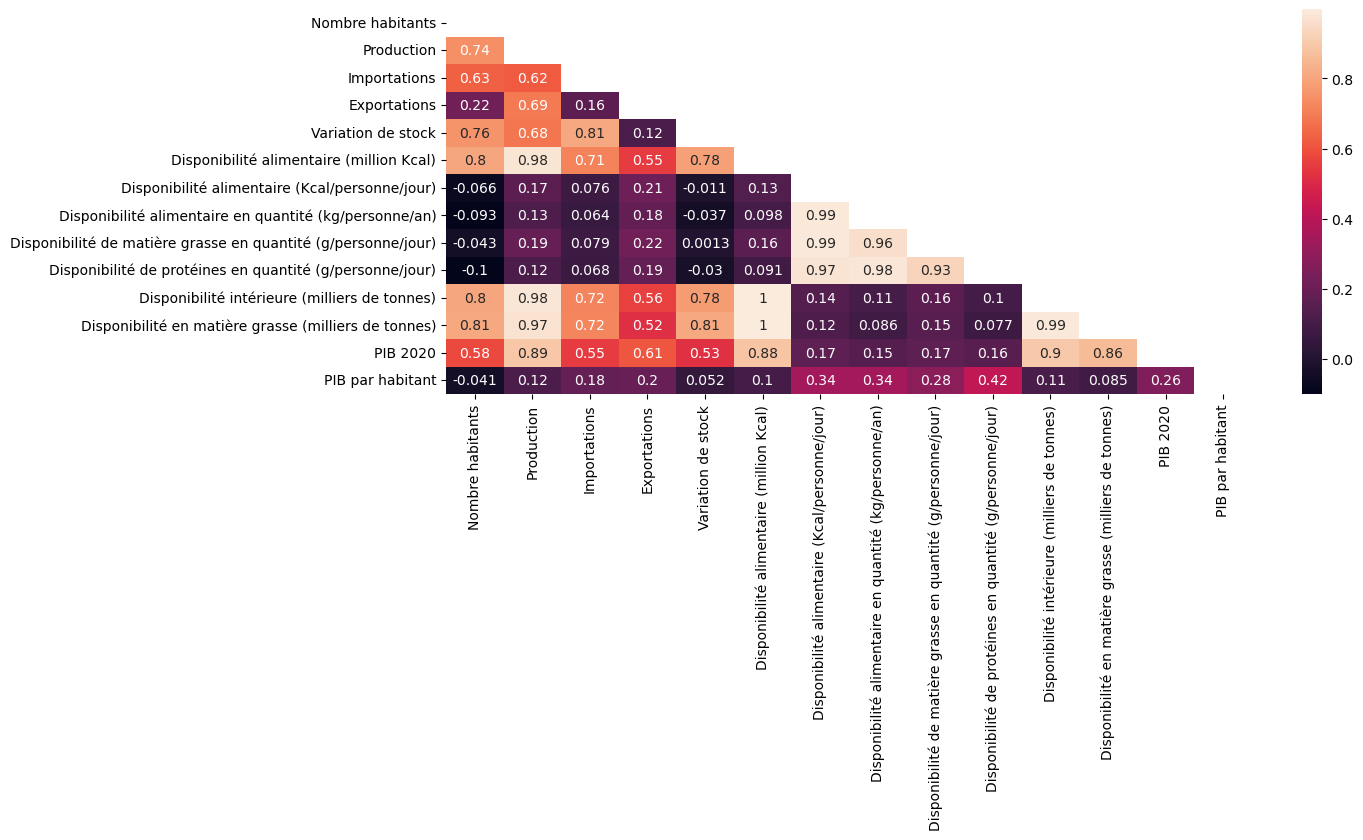

In [78]:
matrix = tableau_donnees_2020.corr()
mask = np.triu(np.ones_like(matrix, dtype=np.bool_))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True)
plt.show()

In [79]:
tableau_donnees_2020.describe()

,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes),PIB 2020,PIB par habitant
count,1.860000e+02,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,1.760000e+02,176.000000
mean,4.957317e+07,837.155914,99.946237,99.817204,23.387097,1.184099e+06,81.161505,22.092204,5.320215,7.772473,860.672043,8.353270e+04,4.751187e+11,13713.113610
std,1.836376e+08,3026.905813,259.332110,444.622705,122.301535,4.587175e+06,64.584020,17.046070,4.454388,5.980281,3010.178446,3.468834e+05,2.010667e+12,19239.065814
min,1.082000e+04,0.000000,0.000000,0.000000,-43.000000,6.875000e+02,1.630000,0.480000,0.100000,0.160000,1.000000,4.292889e+01,1.246857e+08,222.834857
25%,2.447730e+06,10.000000,3.000000,0.000000,0.000000,4.178706e+04,24.582500,6.725000,1.515000,2.397500,39.000000,2.681254e+03,1.192507e+10,1910.305891
50%,9.775375e+06,70.000000,19.000000,0.000000,0.000000,1.350146e+05,68.745000,19.510000,4.225000,6.960000,109.500000,8.362623e+03,4.261573e+10,5256.548709
75%,3.120982e+07,328.000000,84.000000,12.750000,3.750000,4.376801e+05,116.112500,32.812500,7.607500,11.567500,391.250000,3.059548e+04,2.473216e+11,16261.270107
max,1.471287e+09,23150.000000,2391.000000,4047.000000,1113.000000,3.882883e+07,264.830000,74.650000,19.880000,28.380000,24944.000000,3.018051e+06,2.106047e+13,118202.804060


In [80]:
tableau_donnees_2020 = tableau_donnees_2020.replace([np.inf, -np.inf], np.nan).dropna().reset_index().drop(['index'], axis=1)
tableau_donnees_2020.drop(columns=["_merge"],inplace=True)
tableau_donnees_2020

,Area,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (million Kcal),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure (milliers de tonnes),Disponibilité en matière grasse (milliers de tonnes),Country Code,PIB 2020,PIB par habitant
0,Afghanistan,38928350.0,28.0,36.0,0.0,-2.0,85013.52,5.98,1.71,0.37,0.61,62.0,5257.273667,AFG,2.014345e+10,517.449409
1,Albania,2877800.0,14.0,26.0,0.0,0.0,74856.75,71.27,13.94,5.34,5.41,40.0,5609.119980,ALB,1.516273e+10,5268.863092
2,Algeria,43851040.0,284.0,0.0,1.0,3.0,352767.29,22.04,6.38,1.51,1.96,286.0,24168.500696,DZA,1.457437e+11,3323.609265
3,Angola,32866270.0,52.0,224.0,0.0,0.0,338127.40,28.19,8.41,1.77,2.86,276.0,21233.253733,AGO,5.024137e+10,1528.660485
4,Antigua and Barbuda,97930.0,0.0,6.0,0.0,0.0,9465.98,264.83,61.76,19.88,20.31,6.0,710.599666,ATG,1.416348e+09,14462.862740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,33469200.0,66.0,44.0,0.0,7.0,112434.86,9.20,3.09,0.58,0.93,117.0,7085.429640,UZB,6.022470e+10,1799.406657
172,Vanuatu,307140.0,1.0,4.0,0.0,0.0,5607.93,50.02,14.62,3.10,5.17,5.0,347.528910,VUT,9.094210e+08,2960.933267
173,Viet Nam,97338580.0,1319.0,236.0,17.0,0.0,2170337.08,61.09,15.81,4.34,5.14,1538.0,154194.044578,VNM,3.466158e+11,3560.928772
174,Zambia,18383960.0,52.0,21.0,9.0,15.0,59260.06,8.83,2.64,0.56,0.89,79.0,3757.681424,ZMB,1.811064e+10,985.132617


In [81]:
tableau_donnees_2020.columns

Index(['Area', 'Nombre habitants', 'Production', 'Importations',
       'Exportations', 'Variation de stock',
       'Disponibilité alimentaire (million Kcal)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure (milliers de tonnes)',
       'Disponibilité en matière grasse (milliers de tonnes)', 'Country Code',
       'PIB 2020', 'PIB par habitant'],
      dtype='object')

In [82]:
tableau_donnees_2020_v2 = tableau_donnees_2020[['Area', 'Country Code','Nombre habitants', 'Production', 'Importations',
       'Exportations', 'Variation de stock',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure (milliers de tonnes)',
       'PIB par habitant']]
tableau_donnees_2020_v2

,Area,Country Code,Nombre habitants,Production,Importations,Exportations,Variation de stock,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure (milliers de tonnes),PIB par habitant
0,Afghanistan,AFG,38928350.0,28.0,36.0,0.0,-2.0,5.98,62.0,517.449409
1,Albania,ALB,2877800.0,14.0,26.0,0.0,0.0,71.27,40.0,5268.863092
2,Algeria,DZA,43851040.0,284.0,0.0,1.0,3.0,22.04,286.0,3323.609265
3,Angola,AGO,32866270.0,52.0,224.0,0.0,0.0,28.19,276.0,1528.660485
4,Antigua and Barbuda,ATG,97930.0,0.0,6.0,0.0,0.0,264.83,6.0,14462.862740
...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,UZB,33469200.0,66.0,44.0,0.0,7.0,9.20,117.0,1799.406657
172,Vanuatu,VUT,307140.0,1.0,4.0,0.0,0.0,50.02,5.0,2960.933267
173,Viet Nam,VNM,97338580.0,1319.0,236.0,17.0,0.0,61.09,1538.0,3560.928772
174,Zambia,ZMB,18383960.0,52.0,21.0,9.0,15.0,8.83,79.0,985.132617


In [83]:
tableau_donnees_2020_v2.to_csv("tableau_donnees_openclassrooms.csv")